# Projet Smart City

[Infos dataset ](https://opendata.paris.fr/explore/dataset/les-arbres/information/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLnR5cGVlbXBsYWNlbWVudCI6dHJ1ZSwiZGlzanVuY3RpdmUuYXJyb25kaXNzZW1lbnQiOnRydWUsImRpc2p1bmN0aXZlLmxpYmVsbGVmcmFuY2FpcyI6dHJ1ZSwiZGlzanVuY3RpdmUuZ2VucmUiOnRydWUsImRpc2p1bmN0aXZlLmVzcGVjZSI6dHJ1ZSwiZGlzanVuY3RpdmUudmFyaWV0ZW91Y3VsdGl2YXIiOnRydWUsImRpc2p1bmN0aXZlLnN0YWRlZGV2ZWxvcHBlbWVudCI6dHJ1ZSwiZGlzanVuY3RpdmUucmVtYXJxdWFibGUiOnRydWUsImJhc2VtYXAiOiJqYXdnLnN0cmVldHMiLCJsb2NhdGlvbiI6IjEzLDQ4Ljg2ODQ0LDIuMzA5NDUifX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=11,48.87534,2.26902&basemap=jawg.streets)


Problématique : Comment aider la ville de Paris à optimiser ses tournées ?


Trois points où l'analyse de données peut aider :


1. Quels quartiers sont denses en arbres ?


2. De quels arbres il faut s’occuper et où ?

3. Où sont les arbres à replanter ?


In [ ]:
#Importation des bibliothèques

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme('talk')
import matplotlib as mlt
import matplotlib.pyplot as plt

## Version des logiciels

print("------------------DEPENDANCES------------------ \n \n")
!python --version
print("pandas version: " + pd.__version__)
print("numpy version: " + np.__version__)
print("seaborn version: " + sns.__version__)
print("matplotlib version: " + mlt.__version__)


------------------DEPENDANCES------------------ 
 

Python 3.10.12
pandas version: 2.1.4
numpy version: 1.26.4
seaborn version: 0.13.1
matplotlib version: 3.7.1


In [ ]:
#Chargement des données

# Téléchargement des données depuis le web

!wget https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+2+Participez+%C3%A0+un+concours+sur+la+Smart+City/p2-arbres-fr.csv

# Chargement des données dans un dataframe pandas

arbres_data = pd.read_csv('p2-arbres-fr.csv',delimiter = ';')


--2024-09-27 07:55:12--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+2+Participez+%C3%A0+un+concours+sur+la+Smart+City/p2-arbres-fr.csv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.92.33.96, 52.218.100.195, 52.92.34.248, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.92.33.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28979626 (28M) [text/csv]
Saving to: ‘p2-arbres-fr.csv’

p2-arbres-fr.csv    100%[===================>]  27.64M  11.2MB/s    in 2.5s    

2024-09-27 07:55:15 (11.2 MB/s) - ‘p2-arbres-fr.csv’ saved [28979626/28979626]



## Analyse rapide

Le jeu de données est constituées de mesure prise sur les arbres de la ville (localisation, type, taille, circonférence...)


In [5]:
#@title Dimensions du jeu de données



# Lignes

m = arbres_data.shape[0]

print(f"\nLe dataset est constitué d'informations sur {m:,d} arbres de la ville de Paris")


# Colonnes

n = len(arbres_data.columns)
print(f"Il y a {n} descripteurs pour chaque arbre :\n")

for variable in arbres_data.columns:
    print("\t -> " + variable)




Le dataset est constitué d'informations sur 200,137 arbres de la ville de Paris
Il y a 18 descripteurs pour chaque arbre :

	 -> id
	 -> type_emplacement
	 -> domanialite
	 -> arrondissement
	 -> complement_addresse
	 -> numero
	 -> lieu
	 -> id_emplacement
	 -> libelle_francais
	 -> genre
	 -> espece
	 -> variete
	 -> circonference_cm
	 -> hauteur_m
	 -> stade_developpement
	 -> remarquable
	 -> geo_point_2d_a
	 -> geo_point_2d_b


In [4]:
#@title Informations sur les descripteurs

var_localisation = ['type_emplacement',
                    'domanialite',
                    'arrondissement',
                    'complement_addresse',
                    'numero',
                    'lieu',
                    'id_emplacement',
                    'geo_point_2d_a',
                    'geo_point_2d_b']


print("Descripteurs concernant la localisation de l'arbre : \n - " + "\n - ".join(var_localisation))

var_id_arbre = ['id',
                'libelle_francais',
                'genre',
                'espece',
                'variete',
                'stade_developpement',
                'circonference_cm',
                'hauteur_m',
                ]

print("\n Descripteurs concernant les caractéristiques de l'arbre :  \n - "  + " \n - ".join(var_id_arbre))

Descripteurs concernant la localisation de l'arbre : 
 - type_emplacement
 - domanialite
 - arrondissement
 - complement_addresse
 - numero
 - lieu
 - id_emplacement
 - geo_point_2d_a
 - geo_point_2d_b

 Descripteurs concernant les caractéristiques de l'arbre :  
 - id 
 - libelle_francais 
 - genre 
 - espece 
 - variete 
 - stade_developpement 
 - circonference_cm 
 - hauteur_m


In [ ]:
#@title Inspection du jeu de données :

arbres_data.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [ ]:
#@title Informations sur les types de variables et leurs nombres

arbres_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

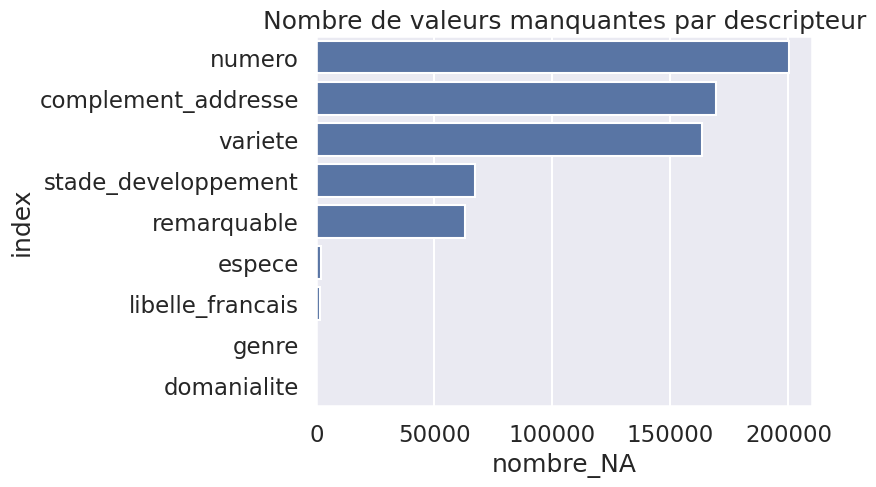

In [ ]:
#@title Identification des valeurs manquantes

#@markdown Nous identifions des valeurs manquantes pour plusieurs colonnes

# Dataframe des valeurs manquantes
NA_data = arbres_data.isnull().sum().reset_index(name='nombre_NA')

# Filtrer les colonnes avec au moinds une valeur manquantes
condition_NA = NA_data['nombre_NA']>0
NA_data = NA_data[condition_NA]

# Affichage
sns.barplot(data = NA_data.sort_values(by = 'nombre_NA', ascending = False),
              y= 'index',
              x = 'nombre_NA')

plt.title("Nombre de valeurs manquantes par descripteur")
plt.show()

Les descripteurs `espece`, `libelle_francais`, `genre`, `domanialite` comportent peu de valeurs manquantes.

Les descripteurs `numero`, `complement_adresse`, `variete`, `stade_developpement`, `remarquable` comportent davantage de valeurs manquantes et il faut les traiter.

Traitements suggérés :

- Supprimer le feature `numero`
- Fusionner `complement_adresse` avec un autre feature
- Associer les NA de `remarquable` en `False`



In [ ]:
#@title Nombre de valeurs distinctes pour chaque descripteur

arbres_data.nunique()

,0
id,200137
type_emplacement,1
domanialite,9
arrondissement,25
complement_addresse,3795
numero,0
lieu,6921
id_emplacement,69040
libelle_francais,192
genre,175


Le descripteur `numero` ne contient aucune valeur et doit être supprimer.

On remarque que le descripteur `type_emplacement` n'apporte pas d'information. On peut le supprimer.

Les descripteurs `domanialite` (si l'arbre est planté dans un jardin, en bordure etc.), `arrondissement`, `stade_developpement`, `remarquable` prennent un faible nombre de valeurs qu'il peut être intéressant de visualiser


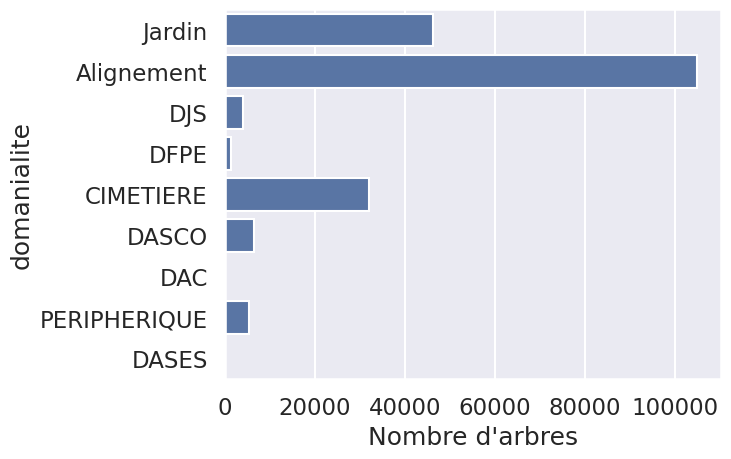

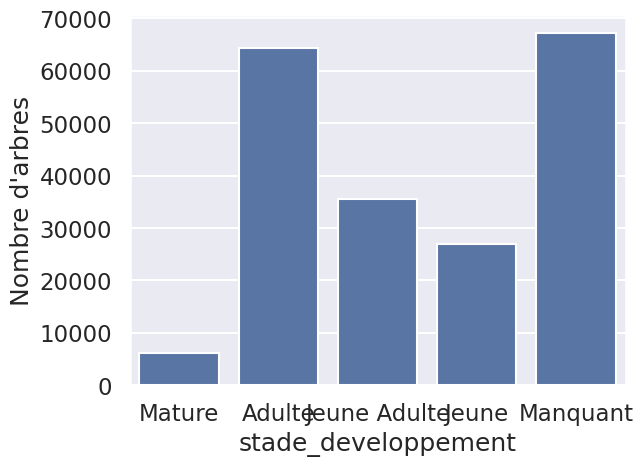

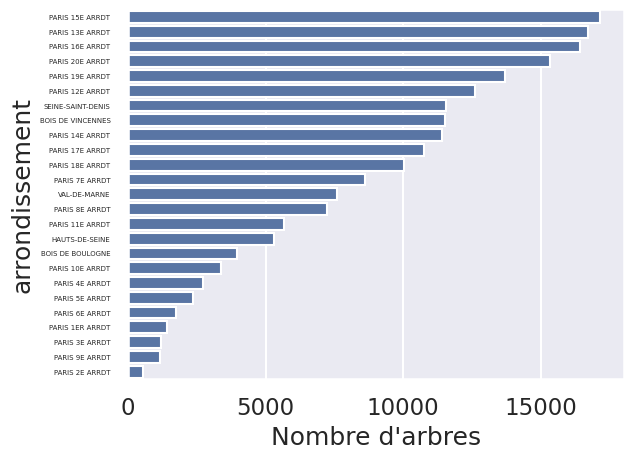


Le dataset contient 184 arbres remarquables



In [ ]:
#@title Premières visualisations

# domanialité

sns.countplot(data = arbres_data,
            y = 'domanialite')

plt.xlabel("Nombre d'arbres")
plt.show()

# stade de développement

replace_dic = {'A': 'Adulte',
               'J': 'Jeune',
               'JA': 'Jeune Adulte',
               'M' : 'Mature',
               np.nan : 'Manquant'}


sns.countplot(data = arbres_data['stade_developpement'].map(lambda val: replace_dic[val]).to_frame(),
            x = 'stade_developpement',
            order = ['Mature', 'Adulte', 'Jeune Adulte', 'Jeune', 'Manquant'])

plt.ylabel("Nombre d'arbres")
plt.show()


# arrondissement

sns.countplot(data = arbres_data,
              y = 'arrondissement',
              order = arbres_data['arrondissement'].value_counts().index)

plt.yticks(fontsize=5)

plt.xlabel("Nombre d'arbres")
plt.show()


# remarquable

n_remarquable = (arbres_data['remarquable'] == 1).sum()
print(f"\nLe dataset contient {n_remarquable} arbres remarquables\n")



On identifie un nombre important de valeurs manquantes pour le stade de développement, ne sachant l'interprếter, nous allons le laisser tel quel.

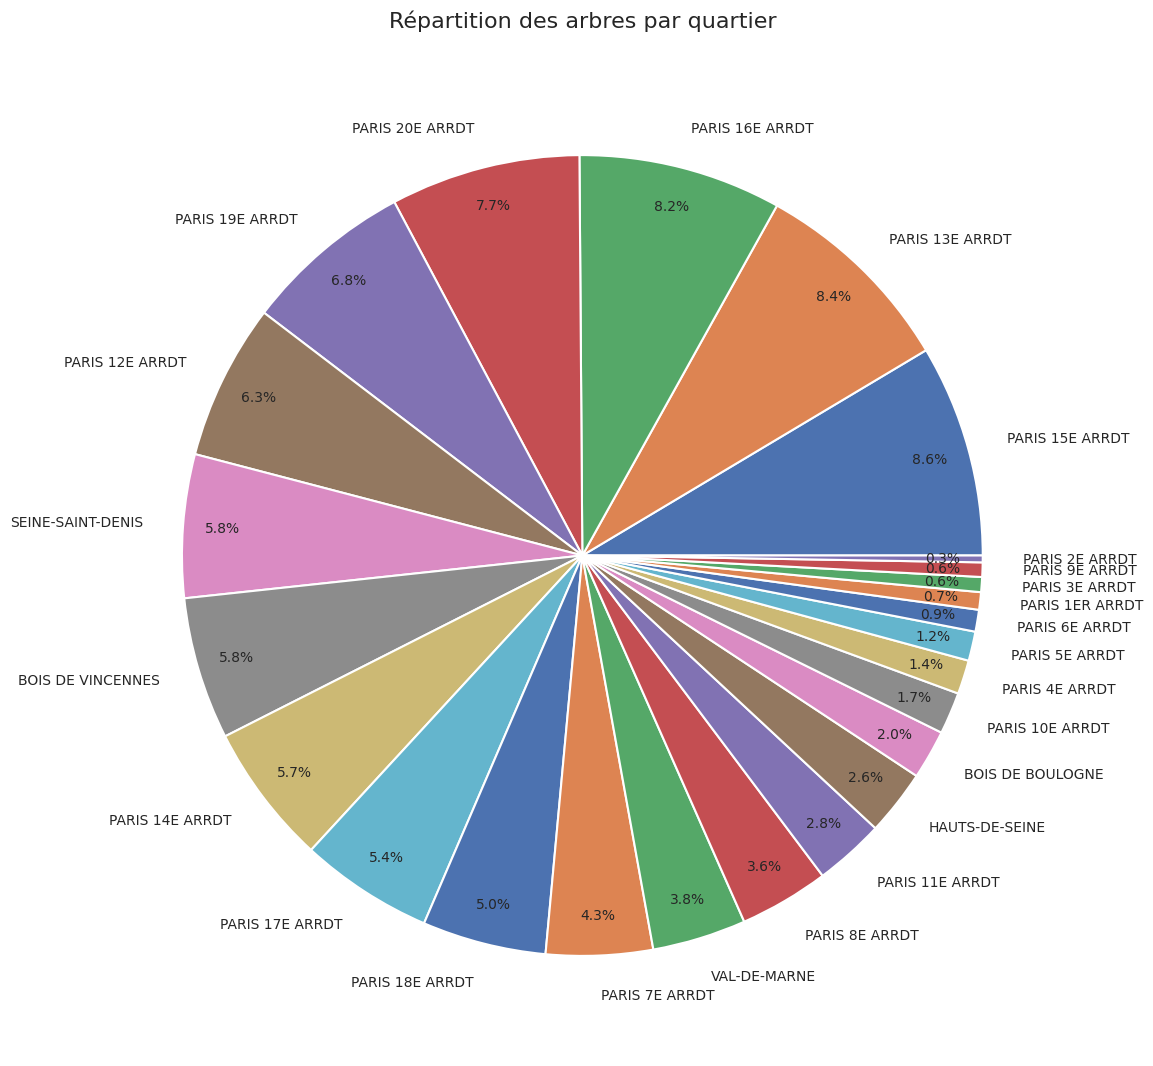

In [ ]:
#@title Nombre d'arbres par quartier

# arrondissement

plt.figure(figsize=(13,13))

#https://stackoverflow.com/a/71515035/2901002
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format

s = arbres_data['arrondissement'].value_counts()
plt.pie(s,labels = s.index,
        autopct=autopct_format(s),
        pctdistance = 0.9,
        textprops={'fontsize':10},
        colors=sns.color_palette('deep'))

plt.title(label = "Répartition des arbres par quartier",
          fontdict={"fontsize":16},
        pad=20)

plt.show()

On voit par exemple que le 15e et 13e sont bien plus arborés que les 2e et 9e arrondissements

In [ ]:
#@title Statistique rapide sur les données numériques

arbres_data[['circonference_cm','hauteur_m', 'geo_point_2d_a', 'geo_point_2d_b']].describe()

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,200137.000000
mean,83.380479,13.110509,48.854491,2.348208
std,673.190213,1971.217387,0.030234,0.051220
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,48.835021,2.307530
50%,70.000000,8.000000,48.854162,2.351095
75%,115.000000,12.000000,48.876447,2.386838
max,250255.000000,881818.000000,48.911485,2.469759


Le tableau ci-dessus montre des outliers pour la hauteur et la circonférence. Nous allons isoler les outliers à l'aide des valeurs typiques de hauteur et circonférence des arbres parisiens.

D'après nos recherches :

- Hauteur max : **42 mètres** (Platane commun, Aisnières-sur-Seine)

- Circonférence max : **1220 cm** (La Planatane d'Auteuil, Paris 16e)

In [ ]:
#@title Gestion des outliers

hauteur_max = 42 #m
circ_max = 1220 #cm

# Gestion des outliers
def get_outliers_max(var_label):

    # suppression des valeurs anormales grâce aux valeurs connues
    if var_label == 'circonference_cm':
        data = arbres_data.query('circonference_cm > @circ_max')['circonference_cm']
    elif var_label == 'hauteur_m':
        data = arbres_data.query('hauteur_m > @hauteur_max')['hauteur_m']

    return data

def get_outliers_zscore(var_label, threshold = 3):

    # suppression des valeurs anormales (Z-score)
    data = arbres_data[var_label]
    z_score = (data - data.mean())/data.std()
    return data[np.abs(z_score) > threshold]

# Sélection des outliers
## Max
out_circ = get_outliers_max('circonference_cm')
out_h = get_outliers_max('hauteur_m')
## Z-score
pd.concat([out_circ,get_outliers_zscore('circonference_cm')])
pd.concat([out_h, get_outliers_zscore('hauteur_m')])


# Affichage des outliers
print(f'{out_circ.shape[0]} outliers circonférence')
print(f'{out_h.shape[0]} outliers hauteurs')



42 outliers circonférence
480 outliers hauteurs


In [ ]:
#@title Nettoyage des données

clean_data = arbres_data.copy(deep =True)

#Suppression de `type_emplacement`
clean_data = clean_data.drop(columns = ['type_emplacement'])

#Suppression de `numero`
clean_data = clean_data.drop(columns = ['numero'])

#Conversion de remarquable en boolean
##On suppose que les valeurs manquantes sont des arbres ordinaires
clean_data['remarquable'] = clean_data['remarquable'].replace({0: False,
                                 np.nan : False,
                                 1: True})

# Conversion des valeurs de stade de développement
clean_data['stade_developpement'] = clean_data['stade_developpement'].replace({'A': 'Adulte',
                                 'J': 'Jeune',
                                 'JA': 'Jeune Adulte',
                                 'M' : 'Mature',
                                 np.nan : 'Manquant',
                                 False: 'Manquant'})


# Suppression des outliers
clean_data = clean_data.query("circonference_cm not in @out_circ")
clean_data = clean_data.query("hauteur_m not in @out_h")

clean_data.head(5)

,id,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,Manquant,False,48.857620,2.320962
1,99875,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,Adulte,False,48.857656,2.321031
2,99876,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,Adulte,False,48.857705,2.321061
3,99877,Jardin,PARIS 7E ARRDT,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,Adulte,False,48.857722,2.321006
4,99878,Jardin,PARIS 17E ARRDT,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,Manquant,False,48.890435,2.315289


## Analyse des données



**(1) Répartition et caractéristiques générales :**

*Distribution spatiale :*

- Quelle est la répartition des arbres dans la ville ? Y a-t-il des zones plus densément arborées que d'autres ?


- Existe-t-il une relation entre la densité d'arbres et l'arrondissement, le type d'emplacement (domanial, public, etc.) ou d'autres caractéristiques urbaines ?
   

*Répartition par type d'arbre :*


- Quelles sont les espèces d'arbres les plus répandues dans la ville ?

- Existe-t-il une variation de la diversité des espèces selon les arrondissements ou les types d'emplacements ?


*Caractéristiques physiques :*


- Quelle est la répartition des arbres par taille (circonférence, hauteur) et stade de développement ?

- Y a-t-il des différences significatives de taille et de développement entre les espèces d'arbres ?
    
**(2) Analyse des relations et comparaisons :**

*Impact du type d'emplacement :*

- Le type d'emplacement (domanial, public, etc.) influence-t-il la taille, l'espèce et l'état des arbres ?
    

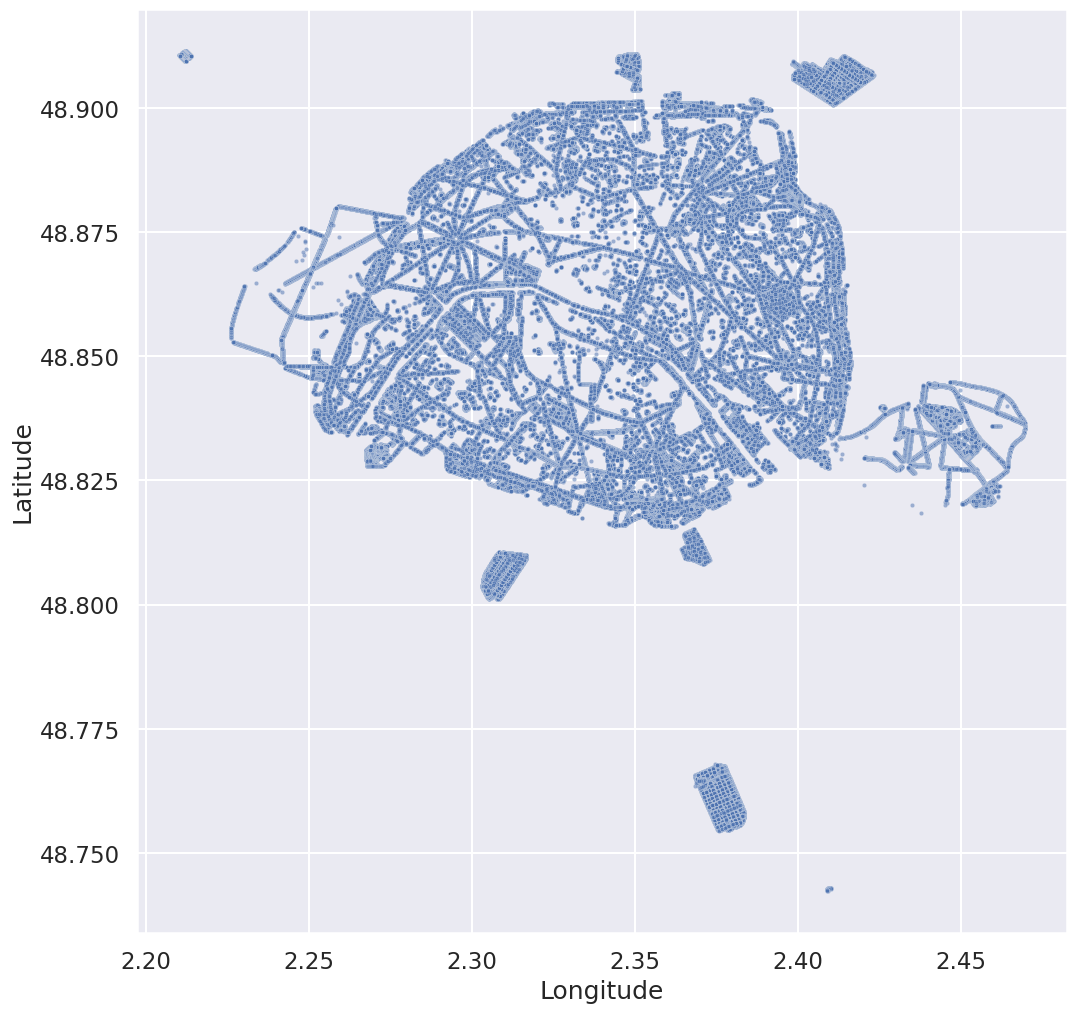

In [ ]:
#@title Distribution spatiale - répartition des zones arborées

fig, ax = plt.subplots(figsize=(12, 12))

sns.scatterplot(data=clean_data,
                x='geo_point_2d_b',
                y='geo_point_2d_a',
                alpha=0.5,
                s= 10,
                ax =ax )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


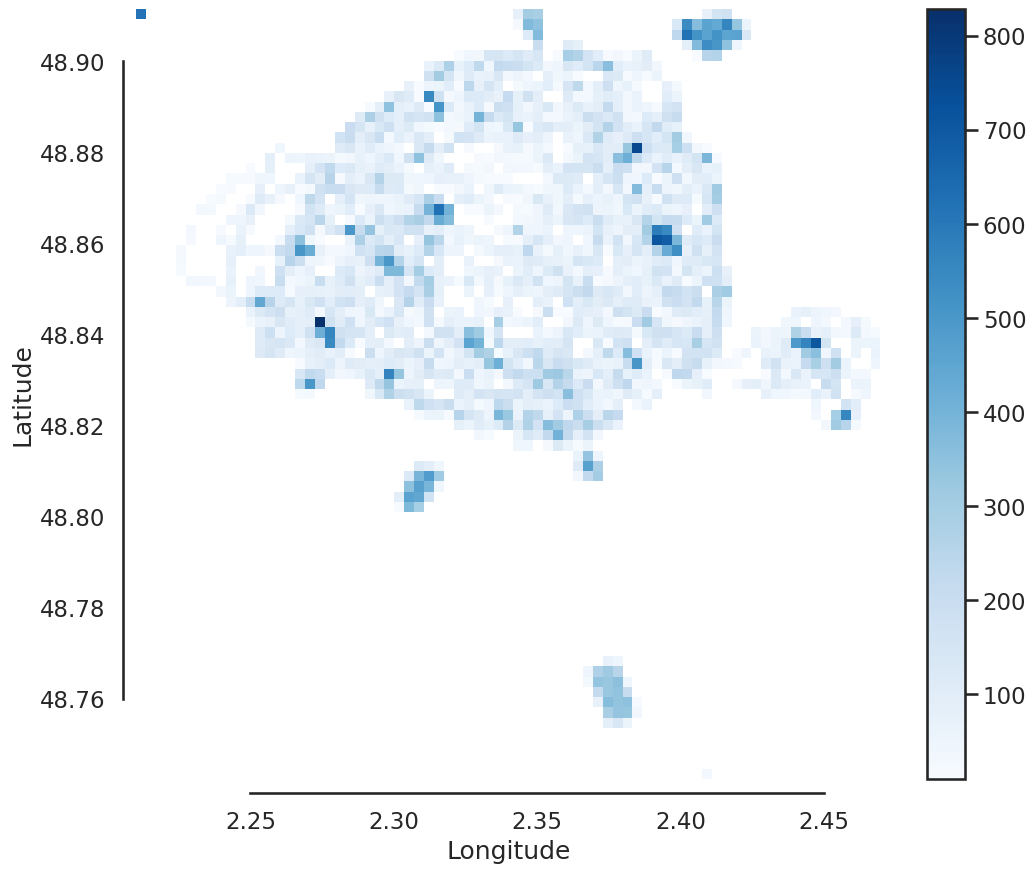

In [ ]:
#@title Distribution spatiale - Densité d'arbres en région parisienne

# sns.jointplot(data=arbres_data,
#               x='geo_point_2d_b',
#               y='geo_point_2d_a',
#               kind='kde',
#               palette='rocket',
#               smooth=True,
#               pointplot=True,
#               alpha=0.8,
#               s=10,
#               title="Densité d'arbres à Paris",
#               xlabel='Longitude',
#               ylabel='Latitude')


# sns.jointplot(data=clean_data,
#               x='geo_point_2d_b',
#               y='geo_point_2d_a',
#               kind='hist',
#               binwidth = 0.008,
#               color = 'lightgreen',
#               height = 10)


plt.figure(figsize = (12,10))

sns.set_style('white')

counts, xedges, yedges, im= plt.hist2d(x=clean_data['geo_point_2d_b'],
            y=clean_data['geo_point_2d_a'],
            bins = (75,75),
            cmap = 'Blues',
            cmin = 10,
            norm = 'linear')

sns.despine(offset = 10, trim = True)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

fig.colorbar(im)


plt.show()



In [ ]:
#@title Distribution spatiale - Densité d'arbres en région parisienne (2)

print("Cette ligne prend du temps, décommentez si besoin :)")

# plt.figure(figsize = (10,10))

# sns.set_style('white')

# sns.kdeplot(data= clean_data,
#             x='geo_point_2d_b',
#             y='geo_point_2d_a',
#             cmap="Blues",
#             fill=True,
#             bw_adjust=.5)

# sns.despine(offset = 10, trim = True)

# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

Cette ligne prend du temps, décommentez si besoin :)


On identifie sur la figure :

- les zones densément arborées (foncé)

- les zones moins arborées (clair)

- les zones non arborées (blanc)



/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'binwidth'
  cset = contour_func(


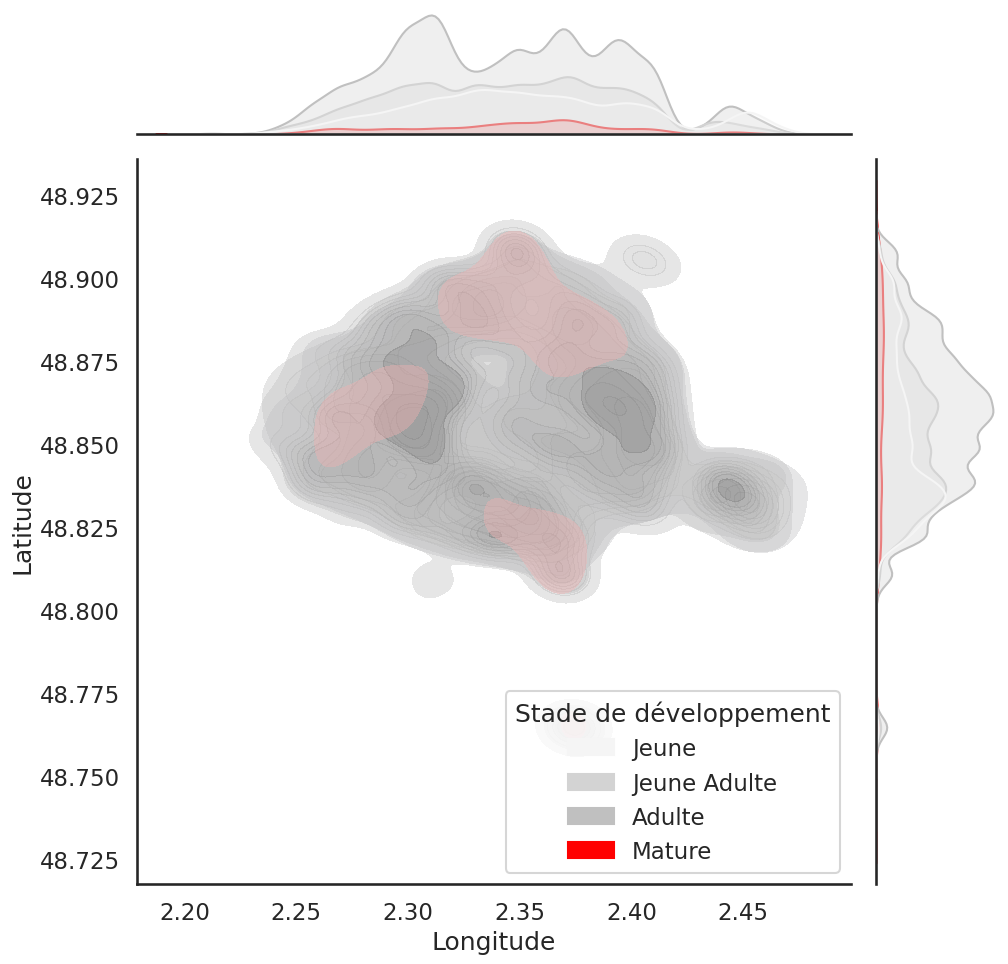

In [ ]:
#@title Distribution spatiale - Stade de développement


g= sns.jointplot(data=clean_data.query("stade_developpement != 'Manquant'"),
              x='geo_point_2d_b',
              y='geo_point_2d_a',
              kind='kde',
              binwidth = 0.003,
              hue = 'stade_developpement',
              hue_order = ['Jeune', 'Jeune Adulte', 'Adulte', 'Mature'],
              palette = ['whitesmoke', 'lightgrey', 'silver', 'red'],
              fill = True,
              alpha = 0.4,
              height = 10)


sns.move_legend(g.ax_joint, loc = "lower right", title = 'Stade de développement')

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


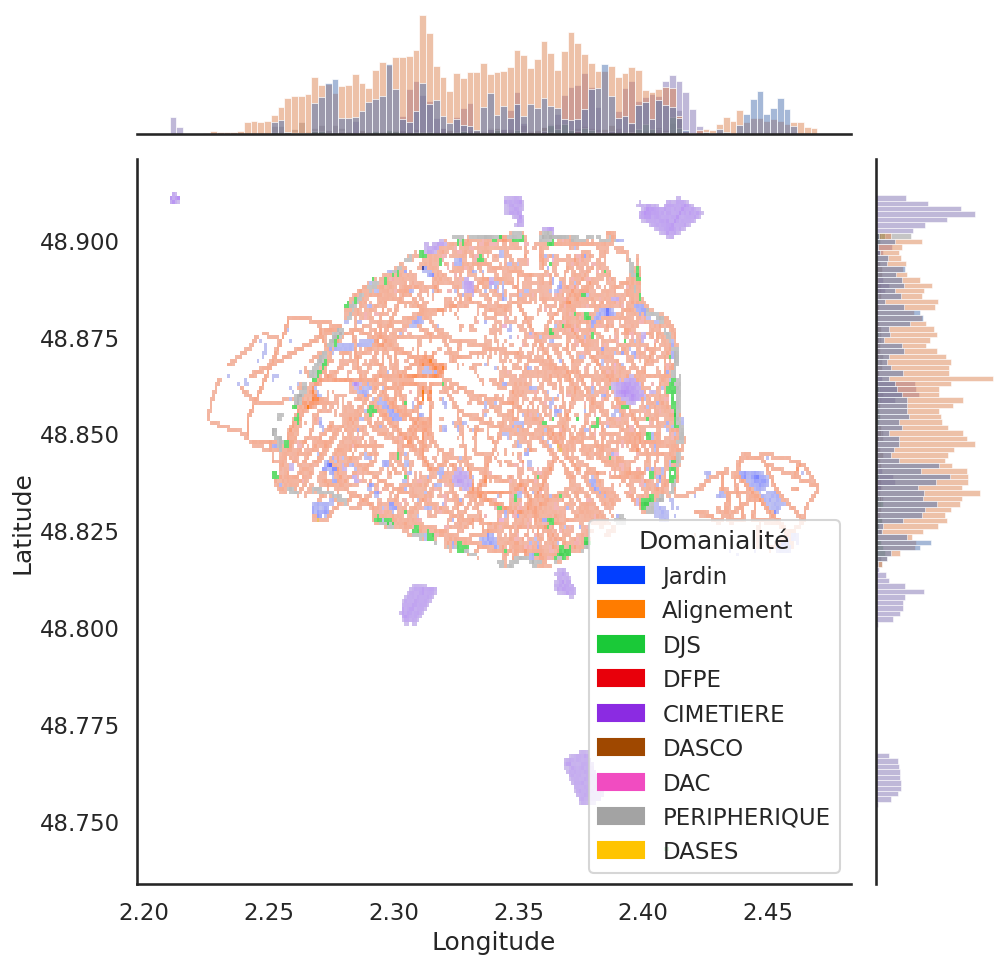

In [ ]:
#@title Distribution spatiale - Domanialité


h = sns.jointplot(data=clean_data,
              x='geo_point_2d_b',
              y='geo_point_2d_a',
              kind='hist',
              binwidth = 0.001,
              hue = 'domanialite',
              palette = 'bright',
              height = 10)


sns.move_legend(h.ax_joint, loc = "lower right", title = 'Domanialité')


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


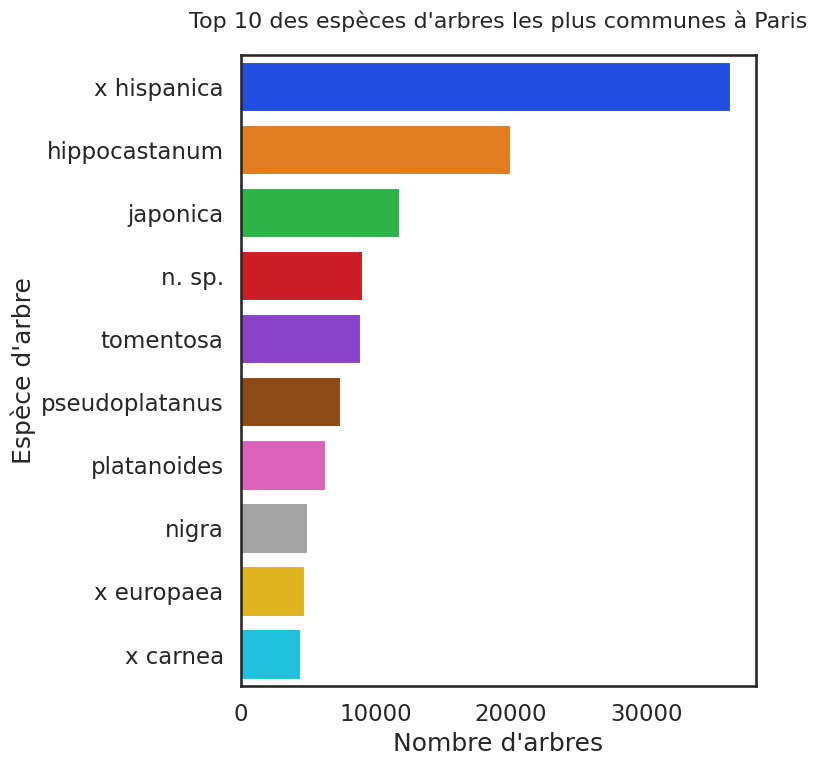

In [ ]:
#@title Espèces d'arbres les plus répandues

top_especes = (clean_data.groupby("espece")
                    .size()
                    .sort_values(ascending = False)
                    .head(10))


plt.figure(figsize = (8,8))
sns.barplot(x=top_especes.values,
            y=top_especes.index,
            hue =top_especes.index,
            legend = False,
            palette  = 'bright')

plt.title("Top 10 des espèces d'arbres les plus communes à Paris",
          pad = 20,
          fontsize = 16)
plt.xlabel("Nombre d'arbres")
plt.ylabel("Espèce d'arbre")
plt.tight_layout()
plt.show()


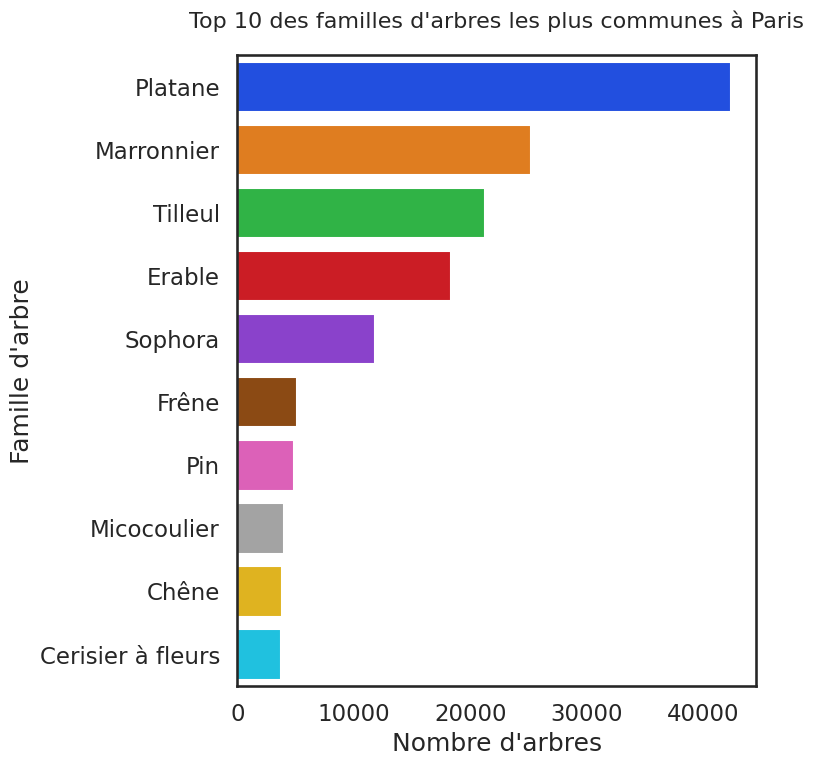

In [ ]:
#@title Familles d'arbres les plus répandues

top_familles = (clean_data.groupby("libelle_francais")
                    .size()
                    .sort_values(ascending = False)
                    .head(10))


plt.figure(figsize = (8,8))
sns.barplot(x=top_familles.values,
            y=top_familles.index,
            hue =top_familles.index,
            legend = False,
            palette  = 'bright')

plt.title("Top 10 des familles d'arbres les plus communes à Paris",
          pad = 20,
          fontsize = 16)
plt.xlabel("Nombre d'arbres")
plt.ylabel("Famille d'arbre")
plt.tight_layout()
plt.show()


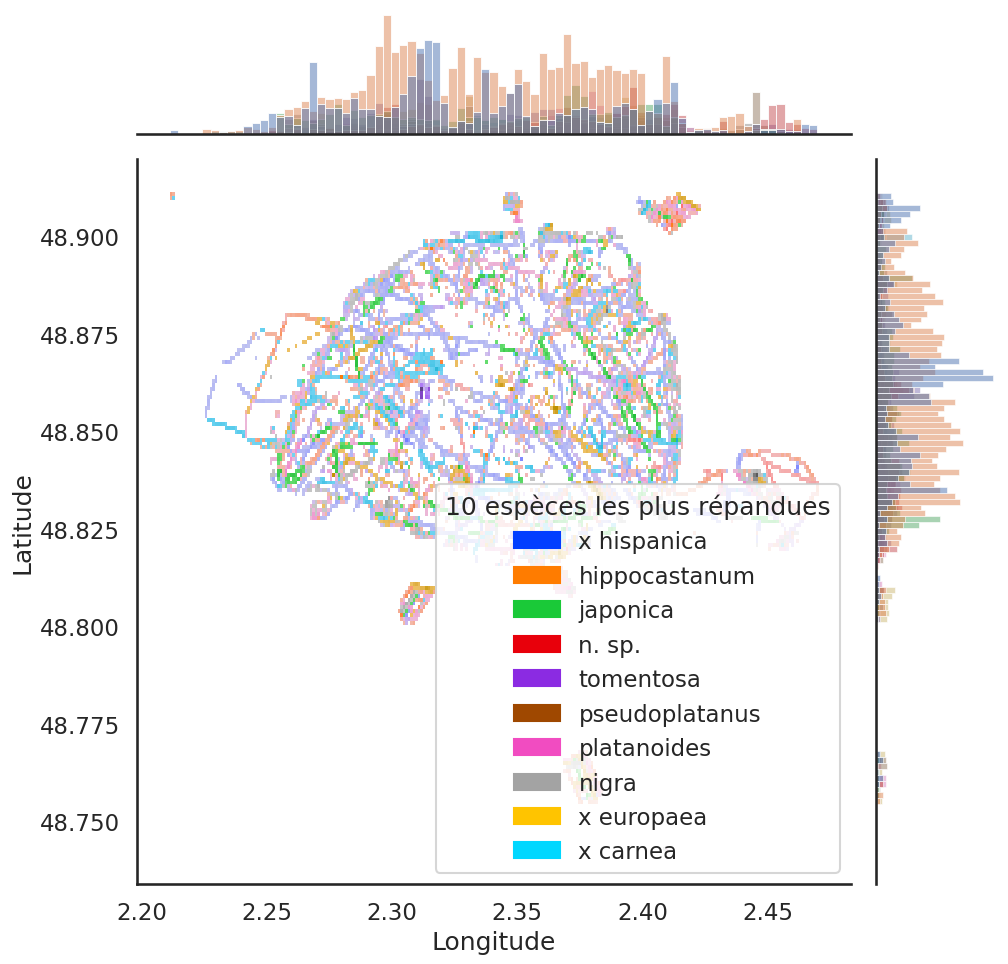

In [ ]:
#@title Répartition des 10 espèces les plus répandues sur la carte

top10_especes = top_especes.index.to_list()

h = sns.jointplot(data=clean_data.query("espece in @top10_especes"),
              x='geo_point_2d_b',
              y='geo_point_2d_a',
              kind='hist',
              binwidth = 0.001,
              hue = 'espece',
              hue_order = top10_especes,
              palette = 'bright',
              height = 10)


sns.move_legend(h.ax_joint, loc = "lower right", title = '10 espèces les plus répandues')


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

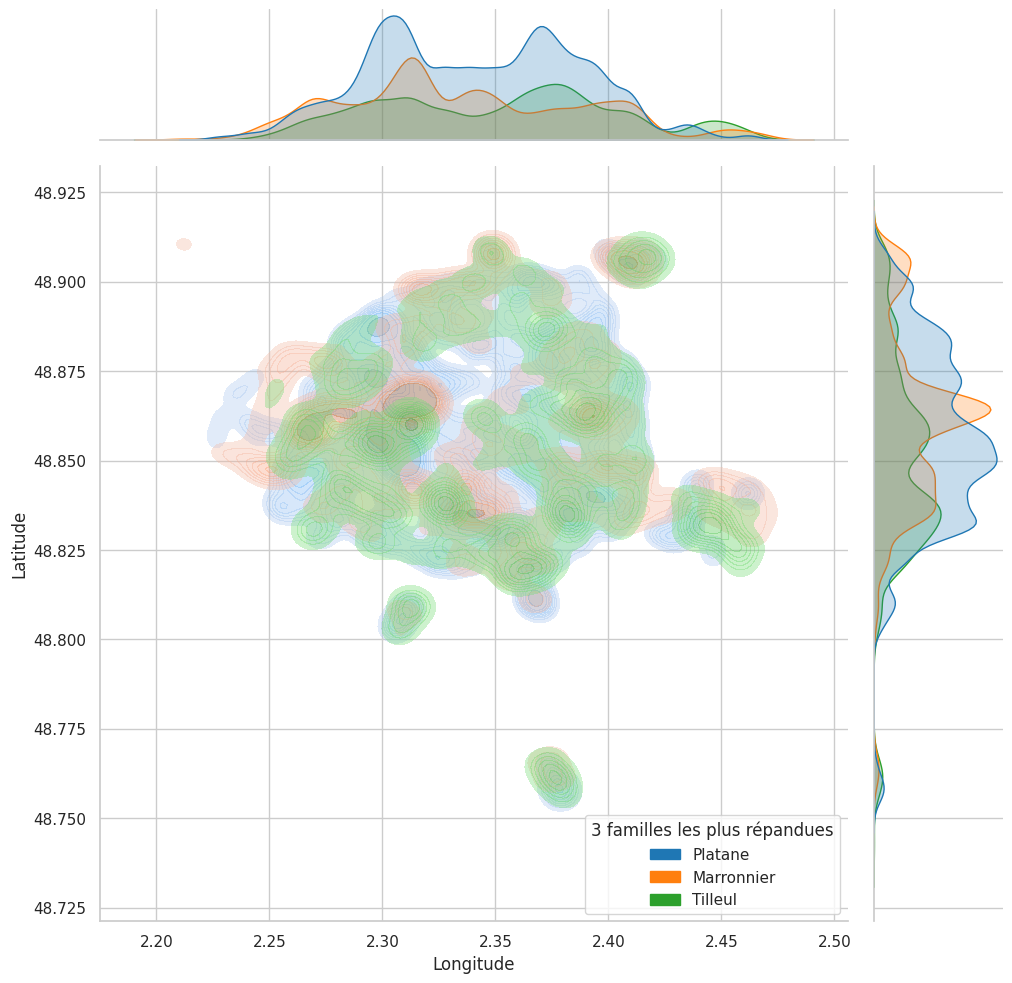

In [ ]:
#@title 3 familles les plus répandues

top_libelle = (clean_data.groupby("libelle_francais")
                    .size()
                    .sort_values(ascending = False)
                    .head(3))


top3_libelle = top_libelle.index.to_list()

# h = sns.jointplot(data=clean_data.query("libelle_francais in @top10_libelle"),
#               x='geo_point_2d_b',
#               y='geo_point_2d_a',
#               kind='hist',
#               binwidth = 0.001,
#               hue = 'libelle_francais',
#               hue_order = top10_libelle,
#               palette = 'tab10',
#               height = 10,
#               marginal_kws={'multiple': 'layer'})



sns.set_theme('notebook')
sns.set_style('whitegrid')
h = sns.jointplot(data=clean_data.query("libelle_francais in @top3_libelle"),
              x='geo_point_2d_b',
              y='geo_point_2d_a',
              hue = 'libelle_francais',
              hue_order = top3_libelle,
              kind = 'kde',
              palette = 'tab10',
              height = 10,
              fill = True,
              multiple = 'fill',
              bw_adjust = 0.5,
              alpha = 0.35
              )



sns.move_legend(h.ax_joint, loc = "lower right", title = '3 familles les plus répandues')


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


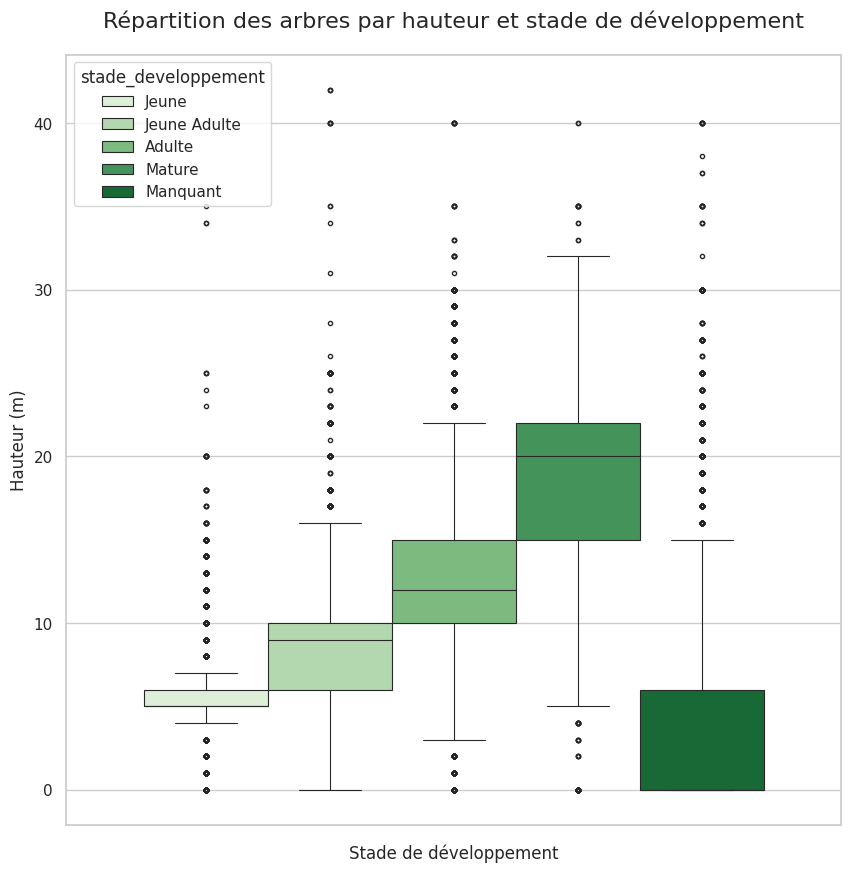

In [ ]:
#@title Hauteur des arbres selon le stade de développement


# Créer un boxplot
plt.figure(figsize = (10,10))
sns.boxplot(data=clean_data,
                y="hauteur_m",
                hue="stade_developpement",
                hue_order = ['Jeune', 'Jeune Adulte', 'Adulte', 'Mature', 'Manquant'],
                palette="Greens",
                fliersize=3,
                linewidth=0.8,
                whis = 1.5)

# Ajouter un titre et des étiquettes
plt.title("Répartition des arbres par hauteur et stade de développement",
          pad = 20,
          fontsize = 16)
plt.xlabel("Stade de développement")
plt.ylabel("Hauteur (m)")

plt.show()


Malgré le nettoyage initial, on observe un nombre significatif d'outliers pour chaque stade de développement.

Hypothèses :

1. C'est lié à certaines espèces plus hautes que la moyenne (développement différent)

2. Le stade de développement a mal été saisi pour certains arbres. À voir plus finement du point de vue des espèces.

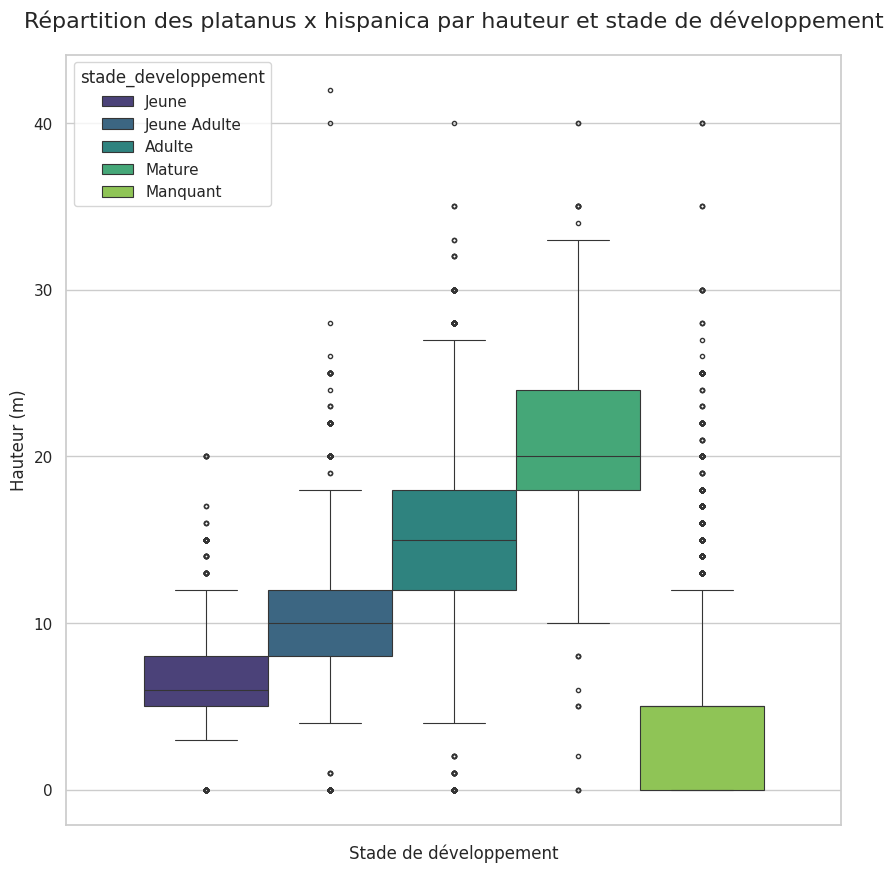

In [ ]:
#@title Hauteur des arbres 'Platanus x hispanica' selon le stade de développement


# Créer un boxplot
plt.figure(figsize = (10,10))
sns.boxplot(data=clean_data.query("espece == 'x hispanica'"),
                y="hauteur_m",
                hue="stade_developpement",
                hue_order = ['Jeune', 'Jeune Adulte', 'Adulte', 'Mature', 'Manquant'],
                palette="viridis",
                fliersize=3,
                linewidth=0.8,
                whis = 1.5)

# Ajouter un titre et des étiquettes
plt.title("Répartition des platanus x hispanica par hauteur et stade de développement",
          pad = 20,
          fontsize = 16)
plt.xlabel("Stade de développement")
plt.ylabel("Hauteur (m)")

plt.show()
